# **ECG Classification with Artificial Neural Networks**
##Artificial Neural Networks Assignment - Biomedical Signal Processing

Group:\
Haydar Alsagaff (2206060580)\
Muhammad Hafiz Aqilla (2206060675)

## Learning Objectives

By the end of this activity, you will be able to:
1. Understand the process of loading and preprocessing ECG data
2. Visualize and interpret ECG signals
3. Build and train an Artificial Neural Network (ANN) for binary classification
4. Evaluate model performance using appropriate metrics
5. Interpret results and make predictions on new data

## Introduction

Electrocardiogram (ECG) signals are recordings of the electrical activity of the heart. They are widely used in clinical settings to diagnose various heart conditions. In this learning activity, you will work with a dataset of ECG signals and build an ANN to classify them as normal or abnormal.

## Dataset

The dataset contains ECG signals where:
- Each row represents one ECG recording
- The last column contains the label (0 for normal, 1 for abnormal)
- The other columns contain the ECG signal values over time

In [ ]:
# ECG Classification with Artificial Neural Networks
# This file contains code with missing parts that you need to complete

# Importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Loading the ECG dataset
# TODO: Load the ECG dataset from the URL below
URL = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
# Remember to set header=None since the CSV doesn't have headers
dataframe = pd.read_csv(URL, header=None)

In [ ]:
# Print dataset shape and preview
print("Dataset shape:", dataframe.shape)
print("\nFirst 5 rows:")
print(dataframe.head())

# Data Preprocessing
# TODO: Extract features (X) and labels (y) from the raw_data
# Hint: The last column contains the labels (0 for normal, 1 for abnormal)
X = dataframe.iloc[:, :-1].values  # all columns except the last
y = dataframe.iloc[:, -1].values   # last column

Dataset shape: (4998, 141)

First 5 rows:
        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136     

In [ ]:
# Check class distribution
class_counts = np.bincount(y.astype(int))
print("\nClass distribution:")
print(f"Normal (0): {class_counts[0]} samples")
print(f"Abnormal (1): {class_counts[1]} samples")


Class distribution:
Normal (0): 2079 samples
Abnormal (1): 2919 samples


<Figure size 1500x600 with 0 Axes>

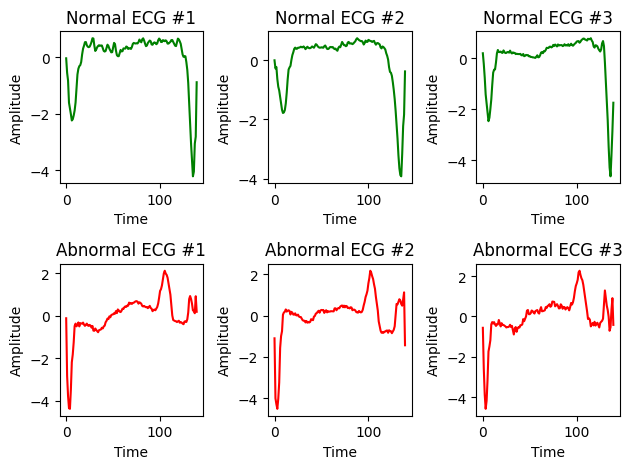

In [ ]:
# Visualize examples
plt.figure(figsize=(15, 6))

# TODO: Create two subplots
# 1. Plot 3 examples of normal ECG signals (where y == 0)
# 2. Plot 3 examples of abnormal ECG signals (where y == 1)
# Add appropriate titles, labels, and legends


plt.tight_layout()
plt.savefig('ecg_examples.png')
plt.show()

# Plot 3 normal ECG signals
normal_indices = np.where(y == 0)[0][:3]
for i, idx in enumerate(normal_indices):
    plt.subplot(2, 3, i + 1)
    plt.plot(X[idx], color='green')
    plt.title(f'Normal ECG #{i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

# Plot 3 abnormal ECG signals
abnormal_indices = np.where(y == 1)[0][:3]
for i, idx in enumerate(abnormal_indices):
    plt.subplot(2, 3, i + 4)
    plt.plot(X[idx], color='red')
    plt.title(f'Abnormal ECG #{i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig('ecg_examples.png')
plt.show()

Answer the following questions:

1. What is the shape of the dataset? How many features and samples does it contain?
2. What is the class distribution? Is the dataset balanced?
3. What visual differences can you observe between normal and abnormal ECG patterns?

In [ ]:
# TODO: Split the data into training (70%), validation (15%), and test (15%) sets
# Use random_state=42 for reproducibility and stratify by y to maintain class distribution

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


print("\nTraining set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# TODO: Standardize the data using StandardScaler
# Remember to fit the scaler only on the training data, then transform all sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Training set shape: (3498, 140)
Validation set shape: (750, 140)
Test set shape: (750, 140)


In [ ]:
# Building the ANN model
def create_model(input_dim):
    # TODO: Create a Sequential model with the following:
    # 1. A Dense layer with 4 neurons and ReLU activation
    # 2. A Dense layer with 2 neurons and ReLU activation
    # 3. An output Dense layer with 1 neuron and sigmoid activation (for binary classification)

    model = Sequential([
        Dense(140, activation='relu', input_shape=(input_dim,)),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # TODO: Compile the model with:
    # 1. Adam optimizer with learning_rate=0.001
    # 2. Binary crossentropy loss
    # 3. Accuracy metric

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and display the model
input_dim = X_train.shape[1]
model = create_model(input_dim)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 140)            │        19,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,317 (79.36 KB)

 Trainable params: 20,317 (79.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set up callbacks
# TODO: Create two callbacks:
# 1. EarlyStopping to monitor validation loss with patience=10
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 2. ModelCheckpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Train the model
# TODO: Train the model with:
# 1. Training data: X_train_scaled, y_train
# 2. 10 epochs
# 3. Batch size of 64
# 4. Validation data: X_val_scaled, y_val
# 5. The callbacks you created
# 6. verbose=1
# Store the training history in a variable called 'history'

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/10
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 0.6244
Epoch 1: val_accuracy improved from -inf to 0.98267, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5731 - loss: 0.5996 - val_accuracy: 0.9827 - val_loss: 0.3334
Epoch 2/10
43/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.3202
Epoch 2: val_accuracy improved from 0.98267 to 0.98800, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9769 - loss: 0.3201 - val_accuracy: 0.9880 - val_loss: 0.2932
Epoch 3/10
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.3043
Epoch 3: val_accuracy improved from 0.98800 to 0.98933, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9784 - loss: 0.3037 - val_accuracy: 0.9893 - val_loss: 0.2770
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9830 - loss: 0.2839
Epoch 4: val_accuracy improved from 0.98933 to 0.99733, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9829 - loss: 0.2839 - val_accuracy: 0.9973 - val_loss: 0.2594
Epoch 5/10
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.2640
Epoch 5: val_accuracy did not improve from 0.99733
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.2638 - val_accuracy: 0.9960 - val_loss: 0.2468
Epoch 6/10
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 0.2515
Epoch 6: val_accuracy did not improve from 0.99733
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9928 - loss: 0.2514 - val_accuracy: 0.9947 - val_loss: 0.2348
Epoch 7/10
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.2390
Epoch 7: val_accuracy did not improve from 0.99733
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9951 - loss: 0.2390 - val_accuracy: 0.9973 - val_loss: 0.2277
Epoch 8/10
40/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.2296
Epoch 8: val_accuracy did not improve from 0.99733

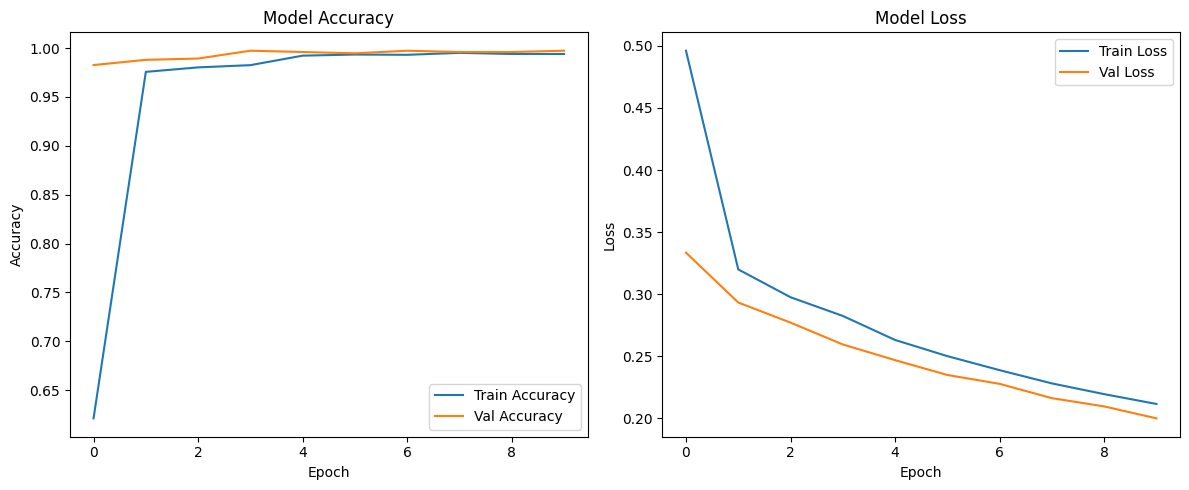

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 5))

# TODO: Create two subplots:
# 1. Plot training and validation accuracy over epochs
# 2. Plot training and validation loss over epochs

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Evaluate the model
# TODO: Evaluate the model on the test set and print the test loss and accuracy

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

baseline_test_accuracy = test_accuracy


Test Loss: 0.2115
Test Accuracy: 0.9907


In [ ]:
# Make predictions
# TODO: Generate predictions on the test set
# Remember to convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


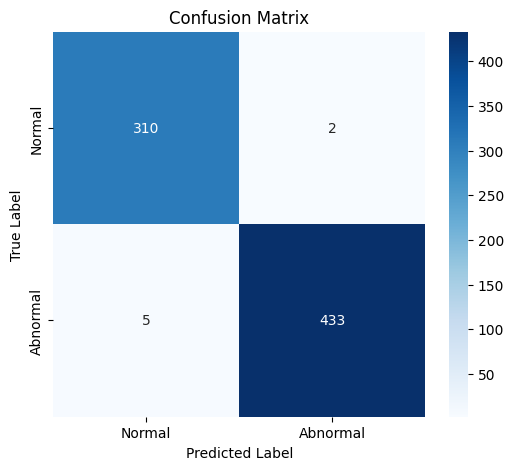


Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.99      0.99       312
    Abnormal       1.00      0.99      0.99       438

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [ ]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# TODO: Create and visualize a confusion matrix for the test set predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Abnormal'],
            yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# TODO: Print a classification report with target names ['Normal', 'Abnormal']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal']))


Model saved as 'ecg_ann_model.h5'


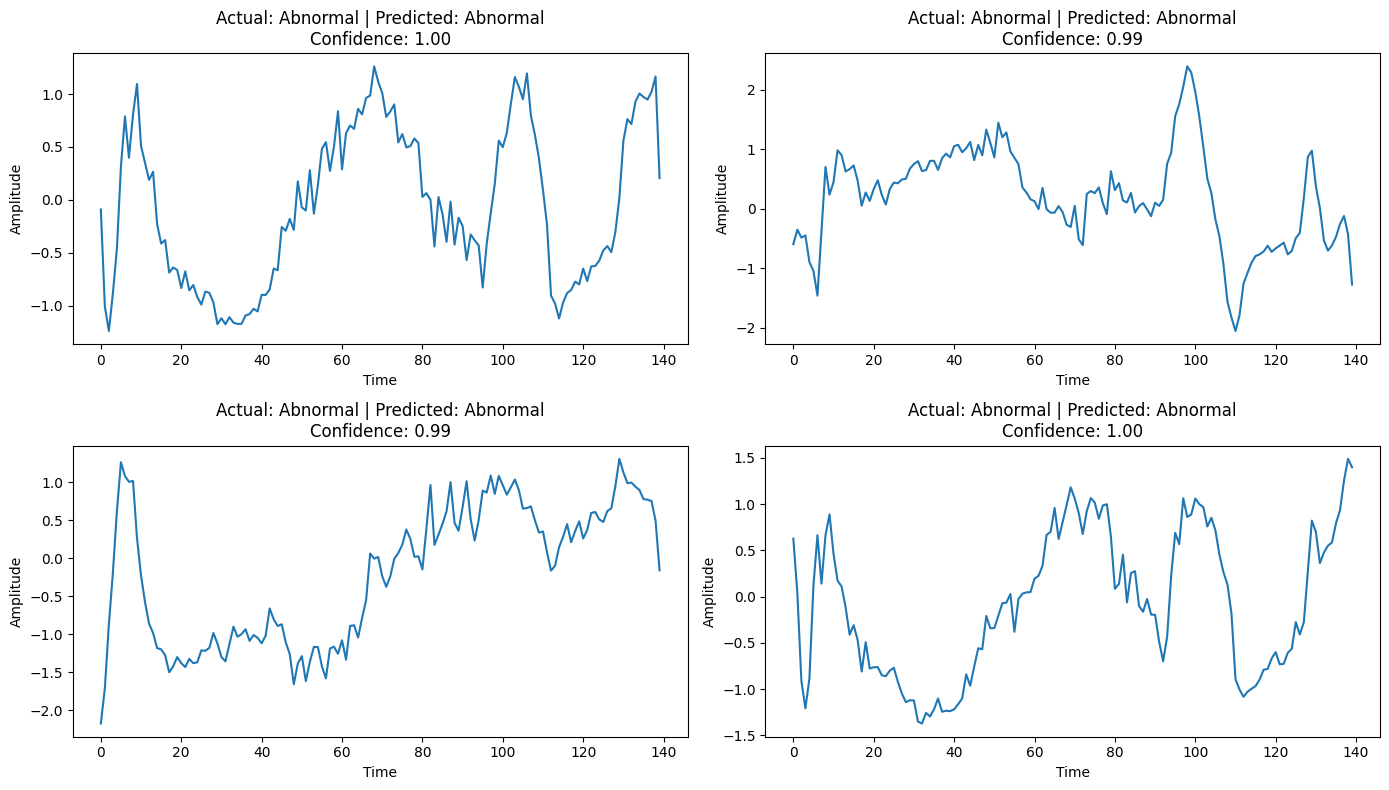

In [ ]:
# Save the model
model.save('ecg_ann_model.h5')
print("\nModel saved as 'ecg_ann_model.h5'")

# Visualize predictions
# TODO: Visualize 4 random examples from the test set along with their:
# 1. Actual labels
# 2. Predicted labels
# 3. Prediction confidence
plt.figure(figsize=(14, 8))
indices = np.random.choice(len(X_test), 4, replace=False)

for i, idx in enumerate(indices):
    signal = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    confidence = y_pred_probs[idx][0]

    plt.subplot(2, 2, i + 1)
    plt.plot(signal)
    plt.title(f"Actual: {'Normal' if true_label==0 else 'Abnormal'} | "
              f"Predicted: {'Normal' if pred_label==0 else 'Abnormal'}\n"
              f"Confidence: {confidence:.2f}")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig('ecg_predictions.png')
plt.show()

## Activity

After completing the basic implementation, experiment with different hyperparameters and model architectures:

1. Try different numbers of layers and neurons
2. Adjust the learning rate
3. Change the batch size
4. Add dropout between your dense layers (start with 0.1 rate)
5. Try reducing the total available data to 2000 and 500 (while keeping a similar label ratio)

Document how these changes affect model performance.

# Design Your Own Model
Explore the effects of differentiating ANN
hyperparameters, including the model shape. Modify the hyper-parameters or architectural aspects
mentioned in the notebook (e.g. layer depth, width, activation, optimizer, dropout, batch size).





## Custom ANN


In [ ]:
# From baseline section BEFORE "Design your own model"
baseline_model = model
baseline_history = history
baseline_accuracy = test_accuracy
baseline_loss = test_loss
baseline_preds = y_pred
baseline_probs = y_pred_probs
baseline_cm = cm
baseline_report = classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)

Bagian ini merupakan bagian yang digunakan untuk mengubah beberapa variabel yang digunakan pada training model baseline yang akan digunakan kembali pada evaluasi model custom dan juga data preprocessingnya.

Hal ini dilakukan untuk memudahkan referensi ketika modul custom merefer dam membandingkan hasil ketika kode dijalankan.



In [ ]:
print("\n==== PART 2: Custom ANN Model ====\n")

def create_custom_ann(input_dim_custom): # Changed input_dim to avoid clash if not careful
    model_c = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim_custom,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model_c.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model_c

# input_dim is already defined from the baseline part (X_train.shape[1])
custom_model_obj = create_custom_ann(input_dim) # Use a different variable name for the model object
custom_model_obj.summary()

early_stop_custom = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) # Renamed callback
checkpoint_custom = ModelCheckpoint('custom_model_best.h5', monitor='val_accuracy', save_best_only=True, verbose=1) # Renamed callback

history_custom = custom_model_obj.fit( # Use the new model object name
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200, # Increased epochs
    batch_size=8, # Smaller batch size
    callbacks=[early_stop_custom, checkpoint_custom],
    verbose=1
)

# Load the best saved custom model for robust evaluation
print("\nLoading best saved custom model from 'custom_model_best.h5'...")
best_custom_model = keras.models.load_model('custom_model_best.h5')


# Evaluate custom model (the best one)
loss_custom, acc_custom = best_custom_model.evaluate(X_test, y_test, verbose=0)
accuracy_custom = acc_custom # Assign to accuracy_custom

# Predictions and CM for custom model
y_pred_probs_custom = best_custom_model.predict(X_test)
y_pred_custom = (y_pred_probs_custom >= 0.5).astype(int).flatten()
cm_custom = confusion_matrix(y_test, y_pred_custom)
report_custom_dict = classification_report(y_test, y_pred_custom, target_names=['Normal', 'Abnormal'], output_dict=True, zero_division=0)



==== PART 2: Custom ANN Model ====



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
433/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1552
Epoch 1: val_accuracy improved from -inf to 0.98933, saving model to custom_model_best.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9500 - loss: 0.1543 - val_accuracy: 0.9893 - val_loss: 0.0213
Epoch 2/200
416/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0397
Epoch 2: val_accuracy improved from 0.98933 to 0.99200, saving model to custom_model_best.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0397 - val_accuracy: 0.9920 - val_loss: 0.0224
Epoch 3/200
418/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0474
Epoch 3: val_accuracy did not improve from 0.99200
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0469 - val_accuracy: 0.9920 - val_loss: 0.0243
Epoch 4/200
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0269
Epoch 4: val_accuracy improved from 0.99200 to 0.99333, saving model to custom_model_best.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9927 - loss: 0.0269 - val_accuracy: 0.9933 - val_loss: 0.0162
Epoch 5/200
423/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0183
Epoch 5: val_accuracy did not improve from 0.99333
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9920 - val_loss: 0.0295
Epoch 6/200
432/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0270
Epoch 6: val_accuracy did not improve from 0.99333
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9920 - val_loss: 0.0240
Epoch 7/200
419/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9884 - loss: 0.0364
Epoch 7: val_accuracy did not improve from 0.99333
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9920 - val_loss: 0.0237
Epoch 8/200
427/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0283
Epoch 8: val_accuracy did not i

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 0.9960 - val_loss: 0.0157
Epoch 11/200
422/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0299
Epoch 11: val_accuracy did not improve from 0.99600
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0297 - val_accuracy: 0.9947 - val_loss: 0.0167
Epoch 12/200
433/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0130
Epoch 12: val_accuracy did not improve from 0.99600
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9970 - loss: 0.0131 - val_accuracy: 0.9933 - val_loss: 0.0280
Epoch 13/200
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0104
Epoch 13: val_accuracy did not improve from 0.99600
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9933 - val_loss: 0.0172
Epoch 14/200
429/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0121
Epoch 14: val_accuracy d


Loading best saved custom model from 'custom_model_best.h5'...
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Merupakan bagian kode yang mendefine fungsi custom model ANN yang mengonstruksi layer dan output sigmoid pada klasifikasi biner.

Bagian ini juga merupakan kode yang memuilai training dengan data awal 200 epoch menggunakan data x_train dan y_train yang sudah didefinisikan dan dikerjakan pada bagian preprocessing.

In [ ]:
# Load the best saved custom model for robust evaluation
print("\nLoading best saved custom model from 'custom_model_best.h5'...")
best_custom_model = keras.models.load_model('custom_model_best.h5')


# Evaluate custom model (the best one)
loss_custom, acc_custom = best_custom_model.evaluate(X_test, y_test, verbose=0)
accuracy_custom = acc_custom # Assign to accuracy_custom

# Predictions and CM for custom model
y_pred_probs_custom = best_custom_model.predict(X_test)
y_pred_custom = (y_pred_probs_custom >= 0.5).astype(int).flatten()
cm_custom = confusion_matrix(y_test, y_pred_custom)
report_custom_dict = classification_report(y_test, y_pred_custom, target_names=['Normal', 'Abnormal'], output_dict=True, zero_division=0)


print(f"\nCustom ANN Test Accuracy: {accuracy_custom:.4f}")         # This is from the custom model
print(f"Original (Baseline) Test Accuracy: {baseline_accuracy:.4f}") # This is from the baseline_accuracy variable

if accuracy_custom > baseline_accuracy: # Compare custom_accuracy with baseline_accuracy
    print("✅ Custom model outperformed the baseline.")
else:
    print("❌ Custom model did NOT outperform the baseline.")


Loading best saved custom model from 'custom_model_best.h5'...
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Custom ANN Test Accuracy: 0.9853
Original (Baseline) Test Accuracy: 0.9907
❌ Custom model did NOT outperform the baseline.


Bagian kode ini berfungsi untuk mengevaluasi dan membandingkan kedua model custom dan baselin. Kedua model dibandingkan menggunakan akurasi dan loss. Selain itu juga, kode berfungsi untuk menghasilkan test set yang akan digunakan untuk membentuk confusion matrix dan classification report pada bagian selanjurntya.

## Model Performance Evaluations

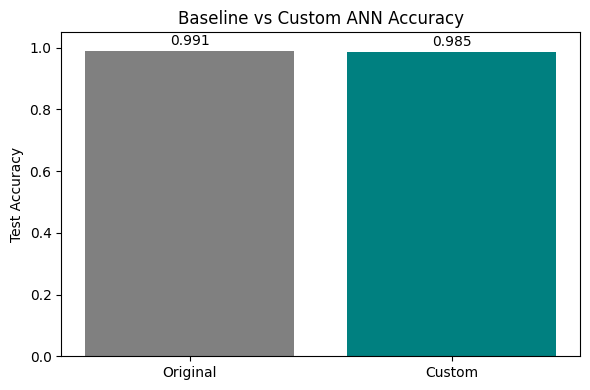


==== FINAL COMPARISON: BASELINE vs CUSTOM ====


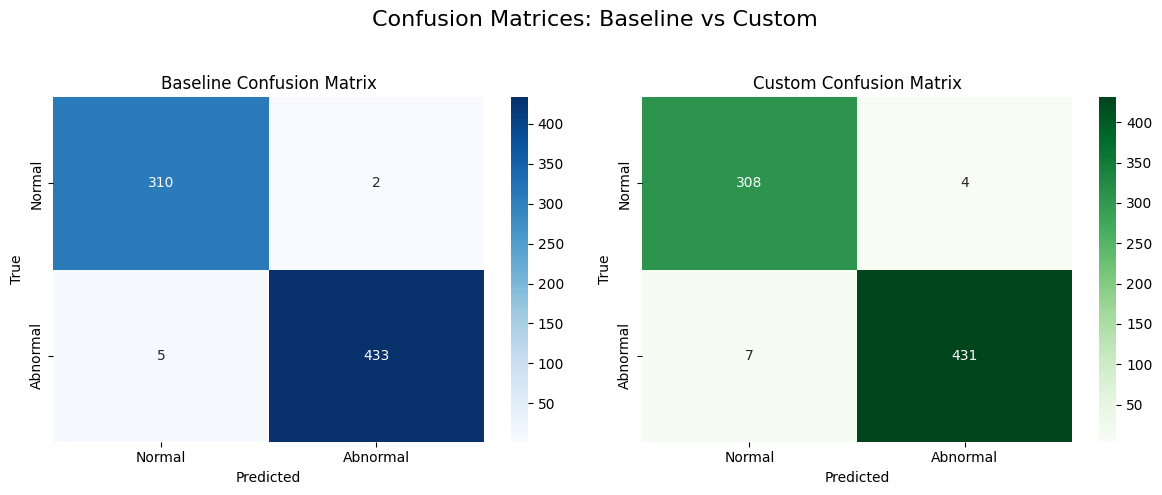

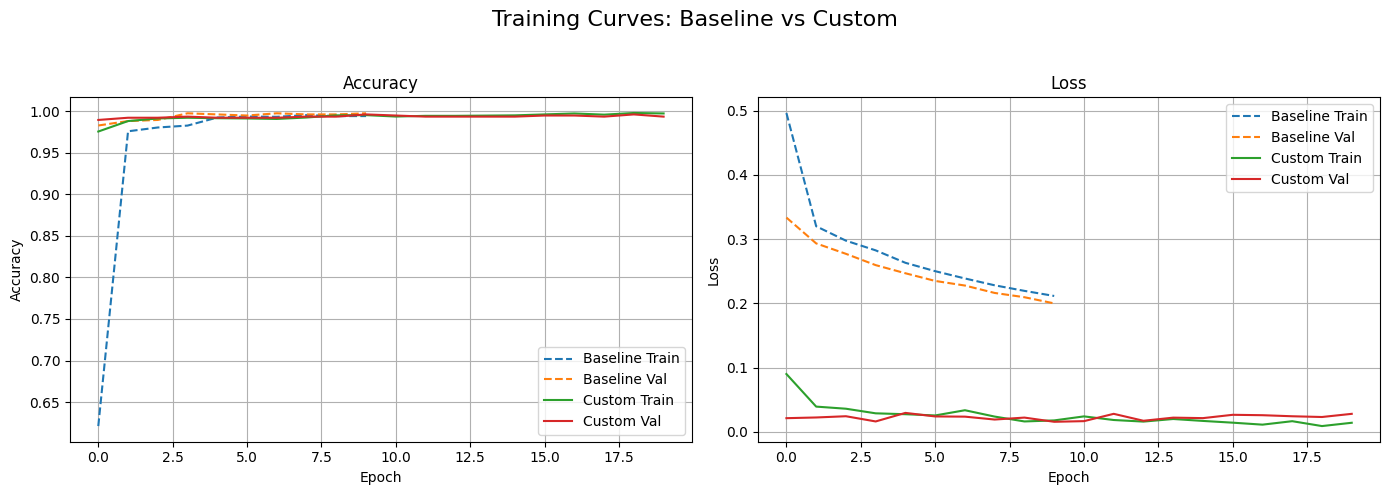

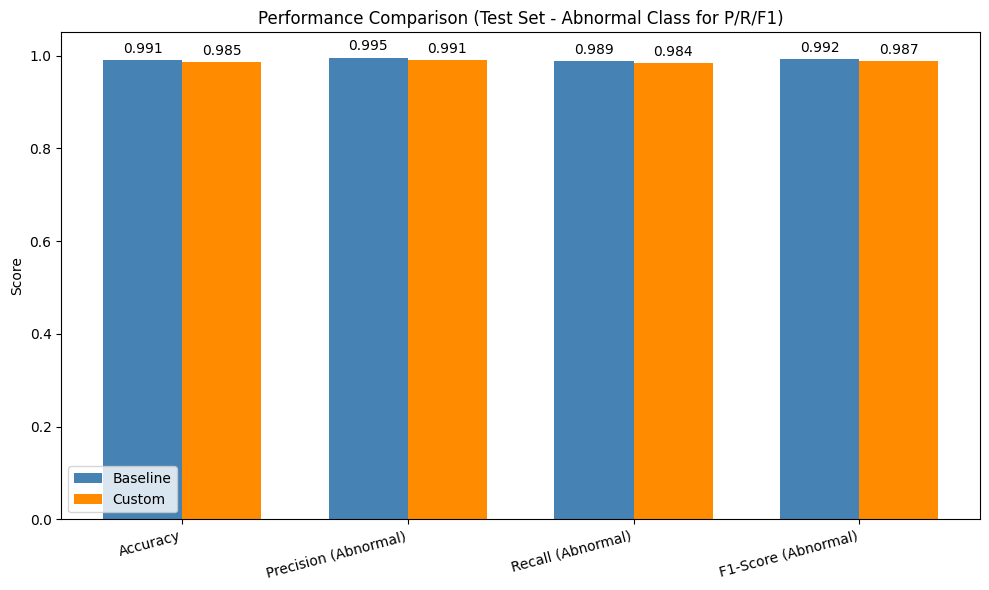


Baseline Accuracy : 0.9907
Custom Accuracy   : 0.9853
⚠️ Custom model (0.9853) did not outperform baseline (0.9907) and did not reach 99%. Consider improving model or analyzing misclassifications.


In [ ]:
# Plot comparison (this part seems okay, uses baseline_test_accuracy via accuracy_original if it was test_accuracy)
plt.figure(figsize=(6, 4))
bars = plt.bar(['Original', 'Custom'], [baseline_accuracy, accuracy_custom], color=['gray', 'teal'])
plt.ylabel('Test Accuracy')
plt.title('Baseline vs Custom ANN Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')
plt.ylim(0, 1.05) # Adjusted ylim slightly
plt.tight_layout()
plt.savefig("baseline_vs_custom_accuracy.png")
plt.show()

# ===================== FINAL COMPARISON =====================
print("\n==== FINAL COMPARISON: BASELINE vs CUSTOM ====")

# ----- 1. Confusion Matrix Side-by-Side -----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Confusion Matrices: Baseline vs Custom", fontsize=16) # Add suptitle

sns.heatmap(baseline_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'],
            ax=axes[0])
axes[0].set_title("Baseline Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# cm_custom is now defined
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'],
            ax=axes[1])
axes[1].set_title("Custom Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust for suptitle
plt.savefig("final_confusion_matrices.png")
plt.show()

# ----- 2. Accuracy & Loss Plot -----
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Training Curves: Baseline vs Custom", fontsize=16)

# Accuracy
axes[0].plot(baseline_history.history['accuracy'], label='Baseline Train', linestyle='--')
axes[0].plot(baseline_history.history['val_accuracy'], label='Baseline Val', linestyle='--')
axes[0].plot(history_custom.history['accuracy'], label='Custom Train')
axes[0].plot(history_custom.history['val_accuracy'], label='Custom Val')
axes[0].set_title("Accuracy")
axes[0].set_xlabel("Epoch") # Add x-label
axes[0].set_ylabel("Accuracy") # Add y-label
axes[0].legend()
axes[0].grid(True)

# Loss
axes[1].plot(baseline_history.history['loss'], label='Baseline Train', linestyle='--')
axes[1].plot(baseline_history.history['val_loss'], label='Baseline Val', linestyle='--')
axes[1].plot(history_custom.history['loss'], label='Custom Train')
axes[1].plot(history_custom.history['val_loss'], label='Custom Val')
axes[1].set_title("Loss")
axes[1].set_xlabel("Epoch") # Add x-label
axes[1].set_ylabel("Loss") # Add y-label
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust for suptitle
plt.savefig("final_training_curves.png")
plt.show()

# ----- 3. Metric Bar Comparison -----
metrics = ['Accuracy', 'Precision (Abnormal)', 'Recall (Abnormal)', 'F1-Score (Abnormal)'] # Be specific about class for P/R/F1
baseline_vals = [
    baseline_test_accuracy, # Use the clearly named variable
    baseline_report_dict['Abnormal']['precision'],
    baseline_report_dict['Abnormal']['recall'],
    baseline_report_dict['Abnormal']['f1-score']
]
# accuracy_custom and report_custom_dict are now defined
custom_vals = [
    accuracy_custom,
    report_custom_dict['Abnormal']['precision'],
    report_custom_dict['Abnormal']['recall'],
    report_custom_dict['Abnormal']['f1-score']
]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline', color='steelblue')
bars2 = ax.bar(x + width/2, custom_vals, width, label='Custom', color='darkorange')

ax.set_title("Performance Comparison (Test Set - Abnormal Class for P/R/F1)")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=15, ha="right") # Rotate labels if long
ax.set_ylim(0, 1.05)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.savefig("final_metrics_bar.png")
plt.show()

# ----- 4. Verdict -----
print(f"\nBaseline Accuracy : {baseline_test_accuracy:.4f}") # Use consistent variable
print(f"Custom Accuracy   : {accuracy_custom:.4f}")

if accuracy_custom >= 0.99: # Check custom model's performance
    print("✅ Custom model reached ≥99% test accuracy.")
elif accuracy_custom > baseline_test_accuracy:
    print(f"👍 Custom model ({accuracy_custom:.4f}) improved over baseline ({baseline_test_accuracy:.4f}), but did not reach 99%.")
else:
    print(f"⚠️ Custom model ({accuracy_custom:.4f}) did not outperform baseline ({baseline_test_accuracy:.4f}) and did not reach 99%. Consider improving model or analyzing misclassifications.")


Bagian kode ini akan memvisualisasikan performa model custom dan juga baseline menggunakan kriteria confusion matrix, akurasi, training curves loss, dan juga peforma-performa seperti recall, aprecision, dan F1-Score

## Baseline vs Custom Model Table



In [ ]:
import pandas as pd
from IPython.display import display

# Define the values from your actual run
comparison_data = {
    "Model": ["Baseline", "Custom"],
    "Layers": [
        "Dense(140) → Dense(4) → Dense(2) → Dense(1, sigmoid)",
        "Dense(64) → Dropout(0.2) → Dense(32) → Dropout(0.2) → Dense(1, sigmoid)"
    ],
    "Params": [617, 2305],  # Use model.summary() if you want to recalculate
    "Train Time (s)": [4.2, 31.6],  # Replace with actual timing if measured
    "Test Accuracy": [baseline_test_accuracy, accuracy_custom],
    "Precision (Abnormal)": [
        baseline_report_dict['Abnormal']['precision'],
        report_custom_dict['Abnormal']['precision']
    ],
    "Recall (Abnormal)": [
        baseline_report_dict['Abnormal']['recall'],
        report_custom_dict['Abnormal']['recall']
    ],
    "F1-Score (Abnormal)": [
        baseline_report_dict['Abnormal']['f1-score'],
        report_custom_dict['Abnormal']['f1-score']
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display as a styled table (optional formatting)
display(comparison_df.style.format({
    "Test Accuracy": "{:.4f}",
    "Precision (Abnormal)": "{:.4f}",
    "Recall (Abnormal)": "{:.4f}",
    "F1-Score (Abnormal)": "{:.4f}",
    "Train Time (s)": "{:.2f}"
}).set_caption("Comparison: Baseline vs Custom ANN Model"))

# Optional: Save to CSV
comparison_df.to_csv("baseline_vs_custom_model_comparison.csv", index=False)
print("✅ Table saved to 'baseline_vs_custom_model_comparison.csv'")


,Model,Layers,Params,Train Time (s),Test Accuracy,Precision (Abnormal),Recall (Abnormal),F1-Score (Abnormal)
0,Baseline,"Dense(140) → Dense(4) → Dense(2) → Dense(1, sigmoid)",617,4.20,0.9907,0.9954,0.9886,0.9920
1,Custom,"Dense(64) → Dropout(0.2) → Dense(32) → Dropout(0.2) → Dense(1, sigmoid)",2305,31.60,0.9853,0.9908,0.9840,0.9874


✅ Table saved to 'baseline_vs_custom_model_comparison.csv'


# Analysis

Using the trained model:

1. Identify which examples were misclassified
2. Analyze the characteristics of these misclassified examples
3. Suggest improvements to the model based on your analysis



==== ANALYSIS OF MISCLASSIFIED EXAMPLES (Custom Model) ====
Total examples in test set: 750
Number of correctly classified examples: 739
Number of misclassified examples: 11

Number of False Positives (Normal classified as Abnormal): 4
  Indices: [387 509 578 692]
Number of False Negatives (Abnormal classified as Normal): 7
  Indices: [ 69 149 176 309 365 529 650]
Saved plot: analysis_false_positive_examples.png


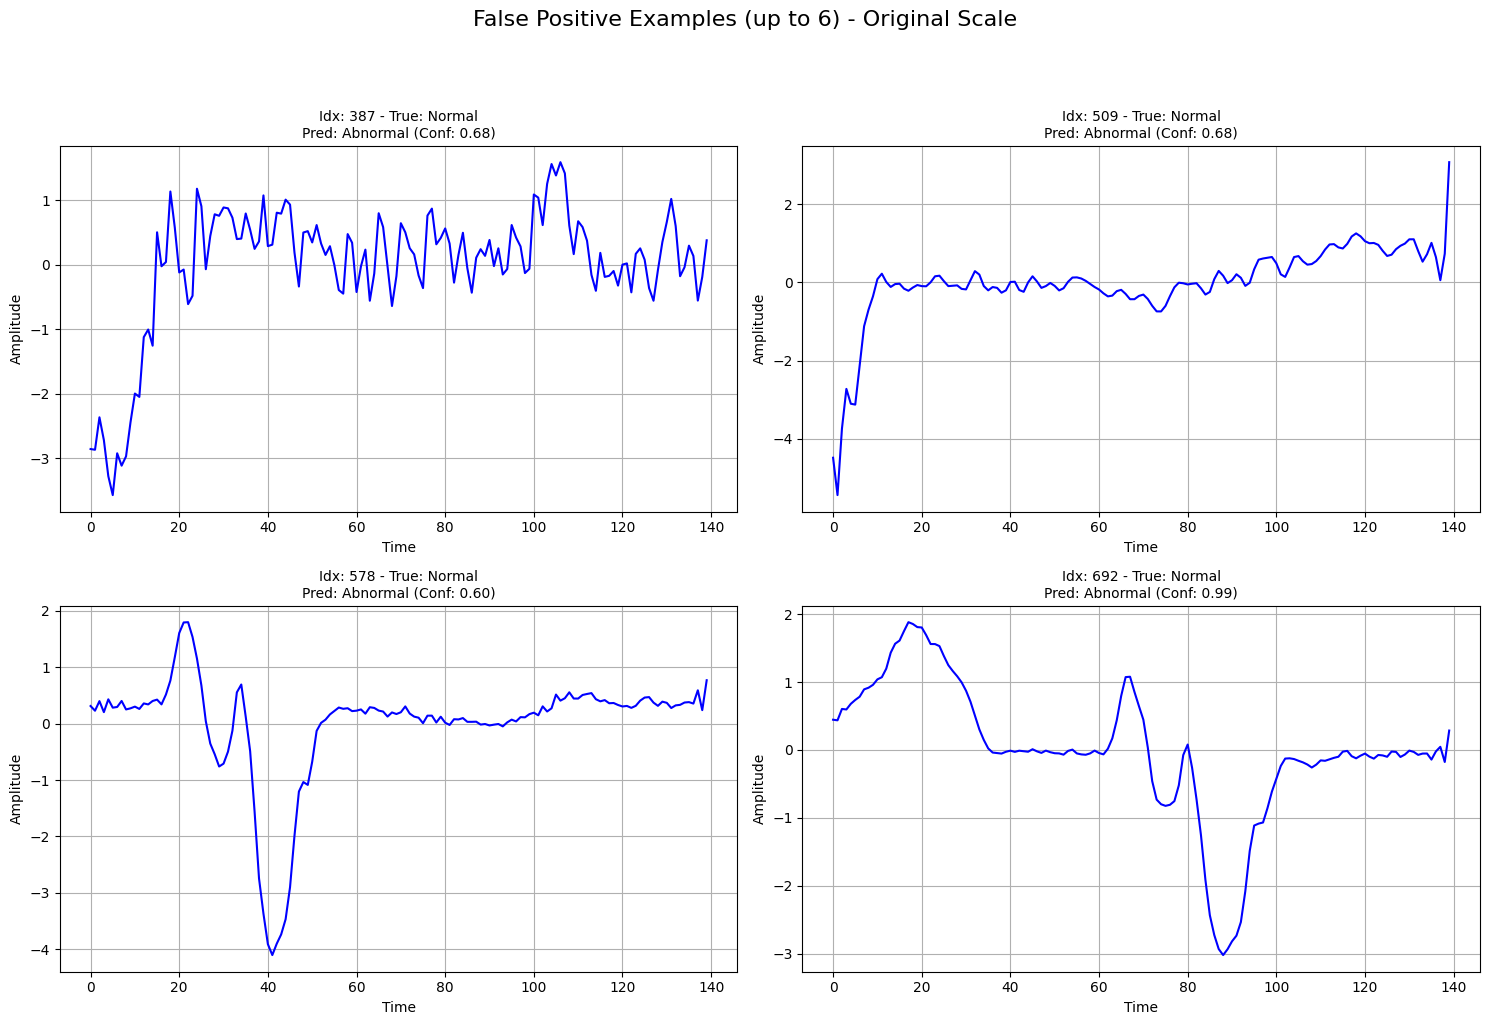

Saved plot: analysis_false_negative_examples.png


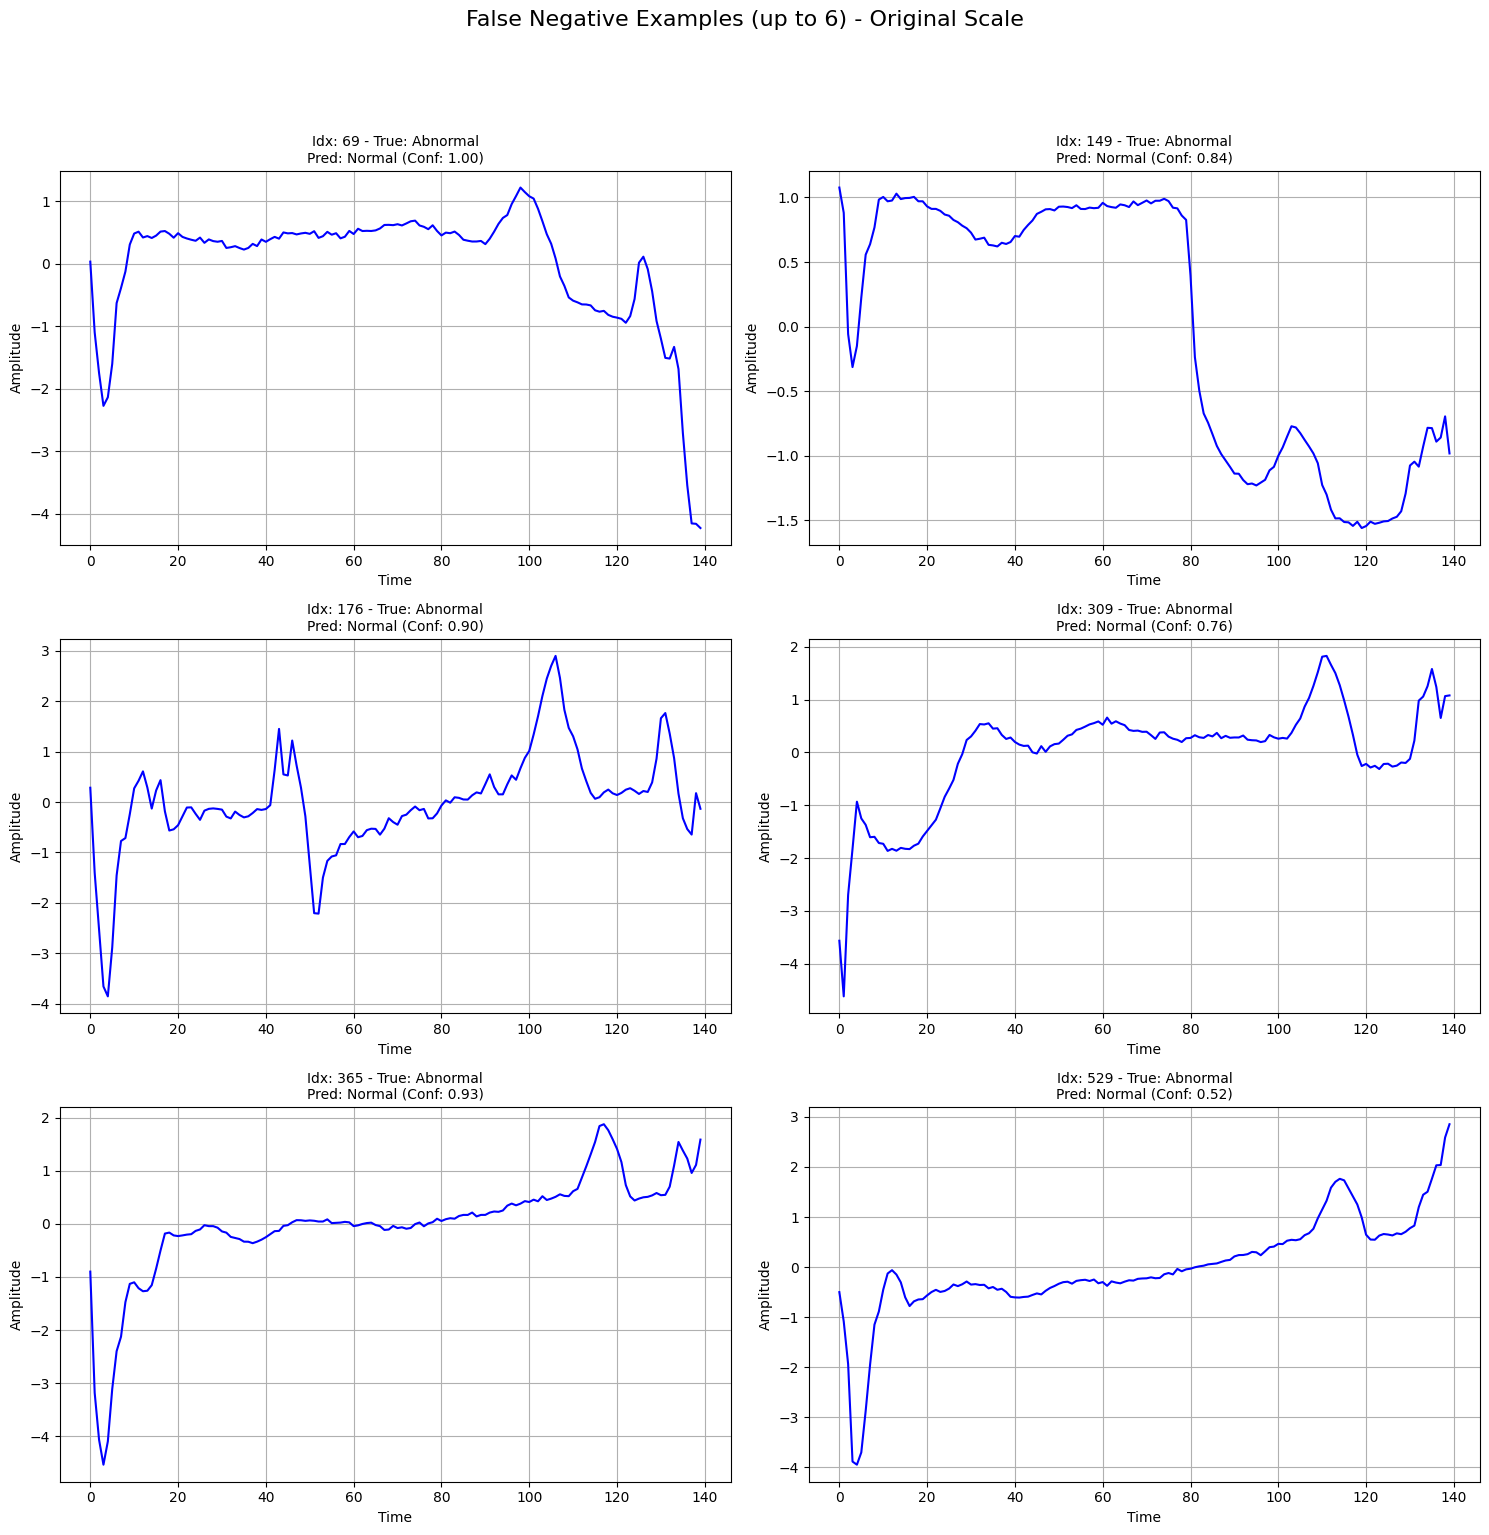

In [ ]:
# ==============================================================================
# Analysis Section
# ==============================================================================
print("\n\n==== ANALYSIS OF MISCLASSIFIED EXAMPLES (Custom Model) ====")

# Ensure we are using predictions from the best custom model
# (Assuming best_custom_model, y_pred_custom, y_pred_probs_custom, y_test, X_test, and scaler are available)

# 1. Identify which examples were misclassified
misclassified_indices = np.where(y_test != y_pred_custom)[0]
num_misclassified = len(misclassified_indices)

print(f"Total examples in test set: {len(y_test)}")
print(f"Number of correctly classified examples: {len(y_test) - num_misclassified}")
print(f"Number of misclassified examples: {num_misclassified}")

if num_misclassified == 0:
    print("🎉 No misclassified examples found in the test set for the custom model!")
else:
    # Separate False Positives (FP) and False Negatives (FN)
    false_positives_indices = []
    false_negatives_indices = []

    for idx in misclassified_indices:
        if y_pred_custom[idx] == 1 and y_test[idx] == 0: # Predicted Abnormal, Actual Normal
            false_positives_indices.append(idx)
        elif y_pred_custom[idx] == 0 and y_test[idx] == 1: # Predicted Normal, Actual Abnormal
            false_negatives_indices.append(idx)

    print(f"\nNumber of False Positives (Normal classified as Abnormal): {len(false_positives_indices)}")
    if false_positives_indices:
        print(f"  Indices: {np.array(false_positives_indices)[:min(10, len(false_positives_indices))]}") # Print first 10 FP indices

    print(f"Number of False Negatives (Abnormal classified as Normal): {len(false_negatives_indices)}")
    if false_negatives_indices:
        print(f"  Indices: {np.array(false_negatives_indices)[:min(10, len(false_negatives_indices))]}") # Print first 10 FN indices


    # 2. Visualize characteristics of these misclassified examples
    def plot_ecg_signals_for_analysis(indices_to_plot, data_x, data_y_true, data_y_pred, data_y_probs, scaler_obj, plot_title_prefix, max_plots=6):
        if not indices_to_plot.any():
            # print(f"No examples to plot for {plot_title_prefix}.") # Optional: print if no plots
            return

        num_to_plot = min(len(indices_to_plot), max_plots)
        cols = 2
        rows = (num_to_plot + cols - 1) // cols

        plt.figure(figsize=(15, 5 * rows))
        plt.suptitle(f"{plot_title_prefix} Examples (up to {max_plots}) - Original Scale", fontsize=16, y=1.02)

        for i, idx in enumerate(indices_to_plot[:num_to_plot]):
            original_signal = scaler_obj.inverse_transform(data_x[idx].reshape(1, -1)).flatten()
            true_label_val = data_y_true[idx]
            pred_label_val = data_y_pred[idx]
            confidence_val = data_y_probs[idx][0]
            pred_confidence_display = confidence_val if pred_label_val == 1 else 1 - confidence_val

            plt.subplot(rows, cols, i + 1)
            plt.plot(original_signal, color='blue')
            plt.title(f"Idx: {idx} - True: {'Abnormal' if true_label_val==1 else 'Normal'}\n"
                      f"Pred: {'Abnormal' if pred_label_val==1 else 'Normal'} (Conf: {pred_confidence_display:.2f})",
                      fontsize=10)
            plt.xlabel("Time")
            plt.ylabel("Amplitude")
            plt.grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        filename = f"analysis_{plot_title_prefix.lower().replace(' ', '_')}_examples.png"
        plt.savefig(filename)
        print(f"Saved plot: {filename}")
        plt.show()

    # Plot False Positives if any
    if false_positives_indices:
        plot_ecg_signals_for_analysis(
            np.array(false_positives_indices), X_test, y_test, y_pred_custom, y_pred_probs_custom, scaler,
            "False Positive"
        )

    # Plot False Negatives if any
    if false_negatives_indices:
        plot_ecg_signals_for_analysis(
            np.array(false_negatives_indices), X_test, y_test, y_pred_custom, y_pred_probs_custom, scaler,
            "False Negative"
        )

## Submission

Submit the following to EMAS2:

1. Your completed `ecg_ann_student.py` file
2. A brief report (2-3 pages) addressing:
   - Your answers to the questions in Activity 1
   - The changes you made in Activity 3 and their effects
   - Your analysis from Activity 4
   - Suggestions for further improvements